In [1]:
import numpy as np
import matplotlib
from cavity_codes.rfp2 import *
from cavity_codes.Bragg_mirror import *
import logging
logging.getLogger('matplotlib.font_manager').disabled = True


## Get Bragg reflection

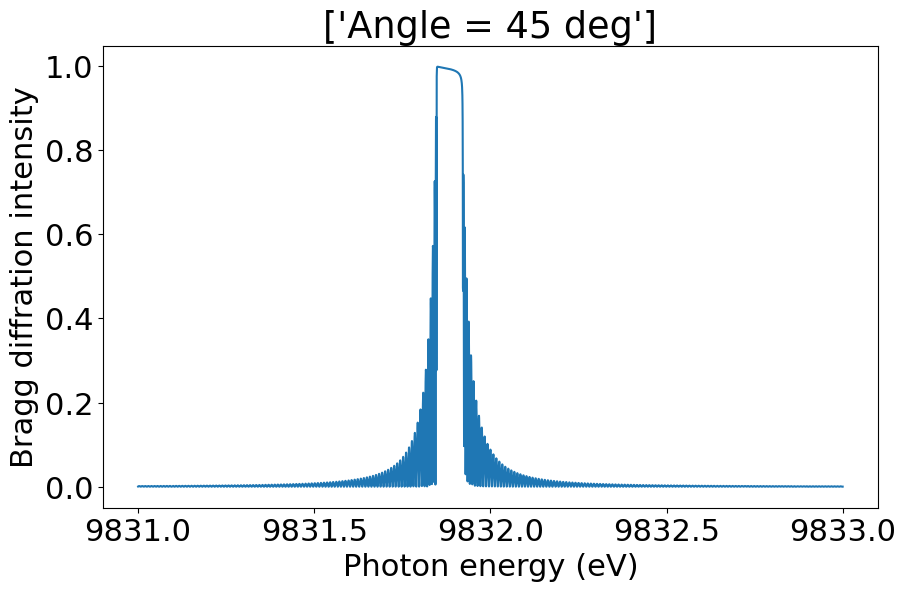

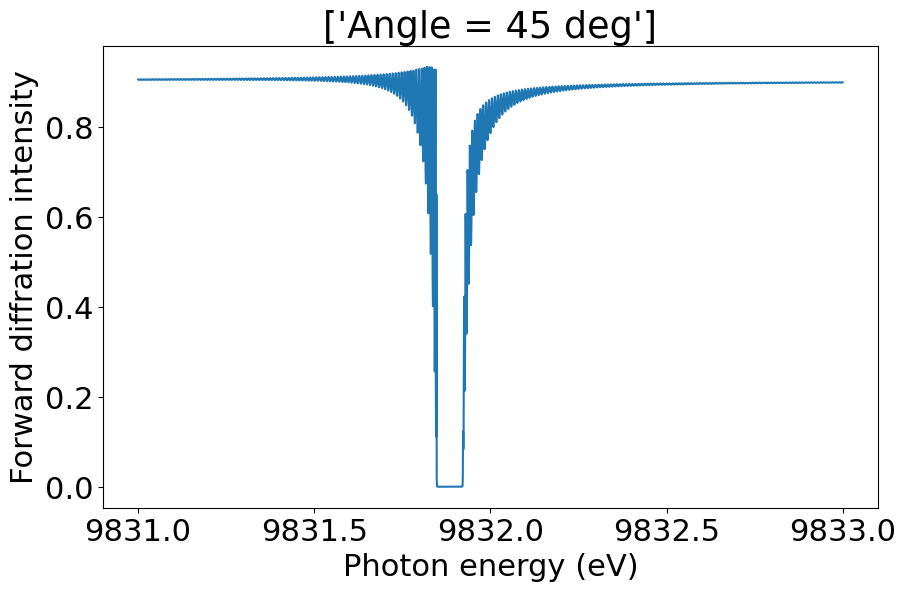

Bragg reflectivitly fwhm  0.07592347853864777 eV


In [25]:
Eph, R0H, R00= plot_Bragg_mirror_response_slice()
Bragg_fwhm =fwhm(R0H)[0]*np.mean(np.diff(Eph))
print('Bragg reflectivitly fwhm ', Bragg_fwhm, 'eV')

In [26]:
1.7/0.07592347853864777

22.390965650166294

### Get a dfl file from previous steady-state simulation

3.701292037963867 seconds to read in fld array (268378112,)
read 8192 slices
6.9141387939453125e-06 seconds to reshape fld array (8192, 181, 181)
norm = 365622290.8116177     energy = 0.0  uJ    t , y  mean = -12.0 fs , 15.1 um      t , y  rms = 37.6 fs , 112.6 um     wt , wy = 75.2 fs , 225.2 um     t , y  fwhm = 55.0 fs , 100.7 um


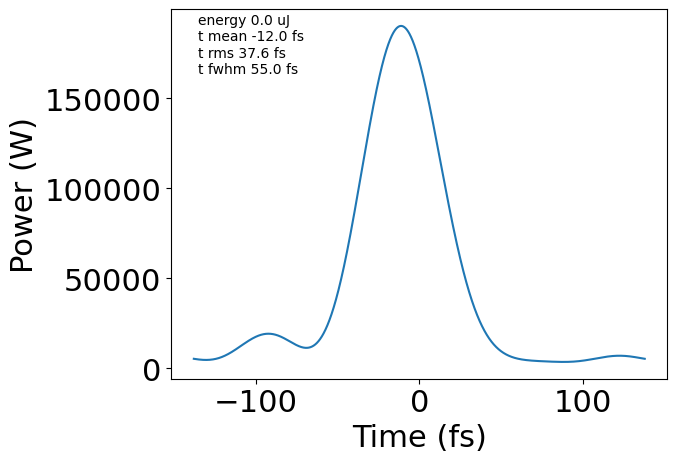

norm = 365622290.81161773     energy = 0.0  uJ    x , y  mean = 6.4 um , 20.4 um      x , y  rms = 132.6 um , 152.0 um     wx , wy = 265.2 um , 304.0 um     x , y  fwhm = 141.7 um , 136.0 um


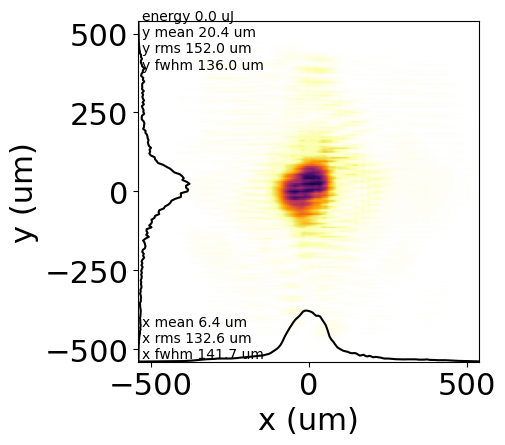

In [14]:
ncar = 181
zsep = 80
xlamds = 1.261043e-10
cspeed = 299792458
dt = zsep*xlamds/cspeed
init_file = 'data_testbw_flat_40/n1_seed_init.dfl'
dfl = read_dfl(init_file, ncar=ncar)
plot_fld_power(dfl, dt = dt)
plot_fld_marginalize_t(dfl, dgrid = 540.e-6, dt=dt)

In [10]:
hws, spectra = get_spectrum(dfl, zsep, xlamds, npad = 0, onaxis=True)
fwhm_spectra = fwhm(spectra)[0]*np.mean(np.diff(hws))
print("FWHM of the seed spectra is ", fwhm_spectra, 'eV')
print("The corresponding fourier limit is ", 1.7/fwhm_spectra, 'fs')

FWHM of the seed spectra is  0.6171122178175679 eV
The corresponding fourier limit is  2.7547663956680206 fs


(9831.0, 9833.0)

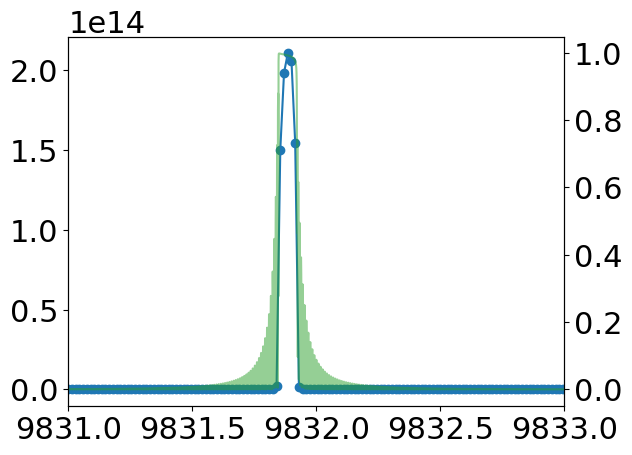

In [11]:
plt.plot(hws, spectra, 'o-')
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(Eph, R0H, color = 'C2', alpha = 0.5)
ax
plt.xlim([9831, 9833])

0.09993267059326172 seconds to read in fld array (21589499,)
read 659 slices
5.4836273193359375e-06 seconds to reshape fld array (659, 181, 181)
norm = 63383716886769.56     energy = 2132.9  uJ    t , y  mean = 0.7 fs , -0.4 um      t , y  rms = 5.5 fs , 41.0 um     wt , wy = 11.0 fs , 82.0 um     t , y  fwhm = 0.1 fs , 57.6 um


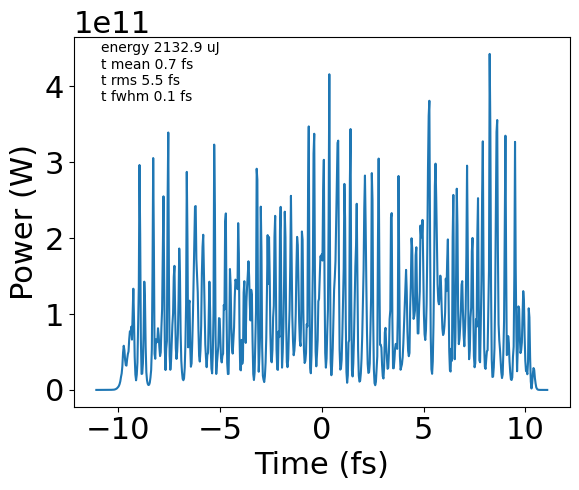

norm = 63383716886769.56     energy = 2132.9  uJ    x , y  mean = 0.0 um , -0.5 um      x , y  rms = 55.1 um , 55.3 um     wx , wy = 110.2 um , 110.6 um     x , y  fwhm = 78.0 um , 77.8 um


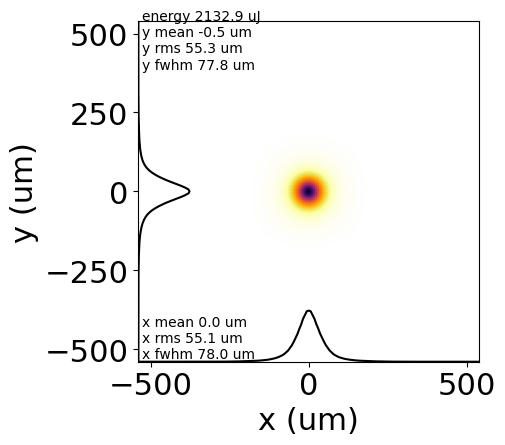

(9831.0, 9833.0)

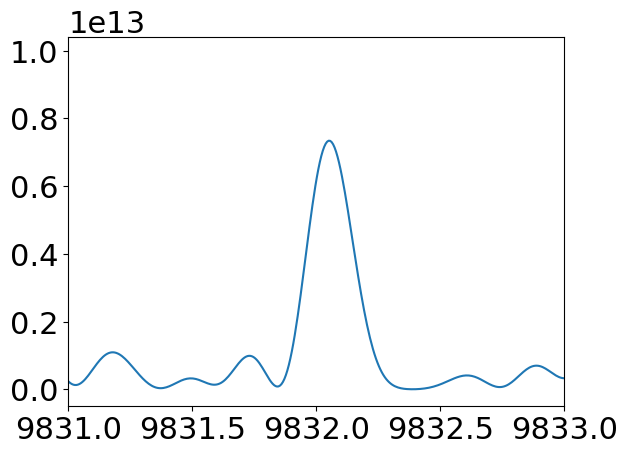

In [19]:
ncar = 181
zsep = 80
xlamds = 1.261043e-10
cspeed = 299792458
dt = zsep*xlamds/cspeed

init_file = 'data_testbw_flat_20/tap0.03_K1.172_n0.out.dfl'
dfl = read_dfl(init_file, ncar=ncar)
plot_fld_power(dfl, dt = dt)
plot_fld_marginalize_t(dfl, dgrid = 540.e-6, dt=dt)
hws, spectra = get_spectrum(dfl, zsep, xlamds, npad = 10000, onaxis=True)
plt.figure()
plt.plot(hws, spectra)
plt.xlim([9831, 9833])

0.2183241844177246 seconds to read in fld array (41246099,)
read 1259 slices
1.4066696166992188e-05 seconds to reshape fld array (1259, 181, 181)
norm = 2486344005917.1143     energy = 83.7  uJ    t , y  mean = 1.4 fs , -2.8 um      t , y  rms = 12.0 fs , 86.6 um     wt , wy = 24.0 fs , 173.2 um     t , y  fwhm = 0.2 fs , 257.9 um


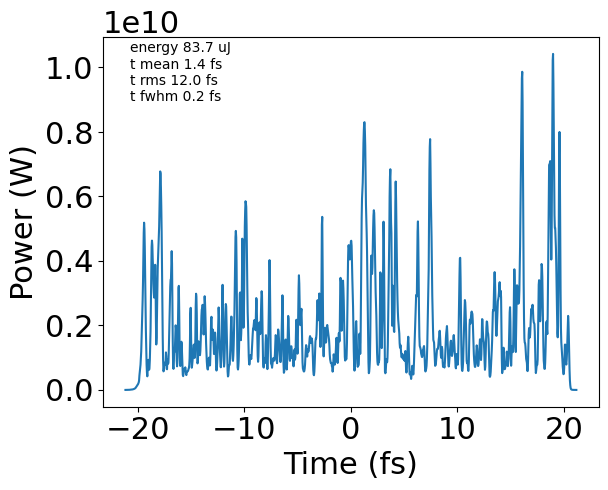

norm = 2486344005917.1133     energy = 83.7  uJ    x , y  mean = -1.0 um , -3.7 um      x , y  rms = 116.6 um , 116.9 um     wx , wy = 233.2 um , 233.8 um     x , y  fwhm = 363.1 um , 348.2 um


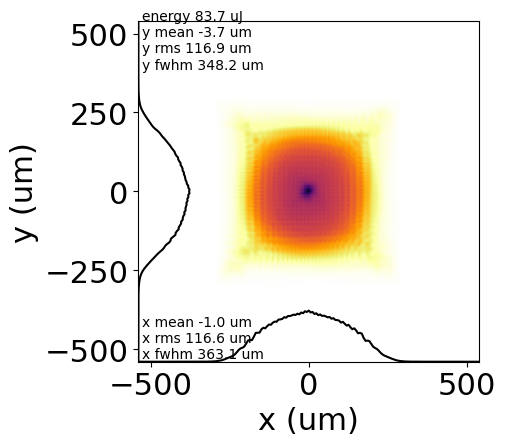

In [22]:
ncar = 181
zsep = 80
xlamds = 1.261043e-10
cspeed = 299792458
dt = zsep*xlamds/cspeed

init_file = 'data_testbw_flat_40/tap0.03_K1.172_n0.out.dfl'
dfl = read_dfl(init_file, ncar=ncar)
plot_fld_power(dfl, dt = dt)
plot_fld_marginalize_t(dfl, dgrid = 540.e-6, dt=dt)
hws2, spectra2 = get_spectrum(dfl, zsep, xlamds, npad = 10000, onaxis=True)

NameError: name 'Eph' is not defined

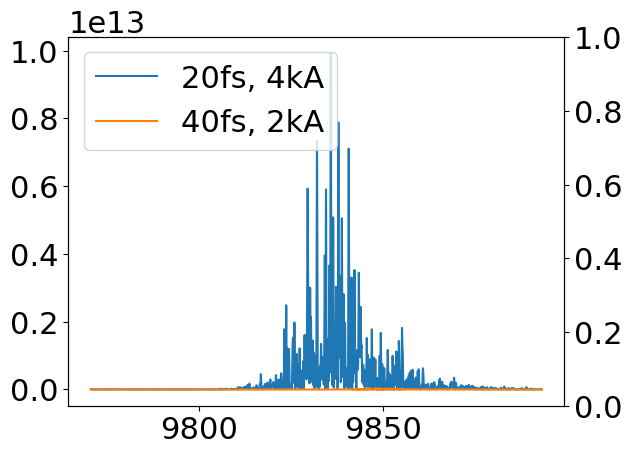

In [21]:
plt.figure()
plt.plot(hws,spectra, label = '20fs, 4kA')
plt.plot(hws2,spectra2, label = '40fs, 2kA')
#plt.plot(hws3,spectra3/np.max(spectra3), label = '30fs')
#plt.plot(hws4,spectra4/np.max(spectra4), label = '40fs')
plt.legend()
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(Eph, R0H, color = 'k', alpha = 0.3)
#plt.xlim([9831, 9833])
ax.set_xlabel('photon energy (eV)')
ax.set_ylabel('on axis FEL spectra')
ax2.set_ylabel('Bragg Reflectivity')

In [ ]:
ncar = 181
zsep = 80
xlamds = 1.261043e-10
cspeed = 299792458
dt = zsep*xlamds/cspeed

init_file = 'data_testbw_flat_20/tap0.03_K1.172_n10.out.dfl'
dfl = read_dfl(init_file, ncar=ncar)
#plot_fld_power(dfl, dt = dt)
#plot_fld_marginalize_t(dfl, dgrid = 540.e-6, dt=dt)
hws2, spectra2 = get_spectrum(dfl, zsep, xlamds, npad = 10000, onaxis=True)

0.7859697341918945 seconds to read in fld array (41246099,)
read 1259 slices
1.430511474609375e-05 seconds to reshape fld array (1259, 181, 181)
norm = 174111008547797.88     energy = 5859.0  uJ    t , y  mean = 0.7 fs , 0.1 um      t , y  rms = 11.2 fs , 35.4 um     wt , wy = 22.4 fs , 70.8 um     t , y  fwhm = 39.3 fs , 62.5 um


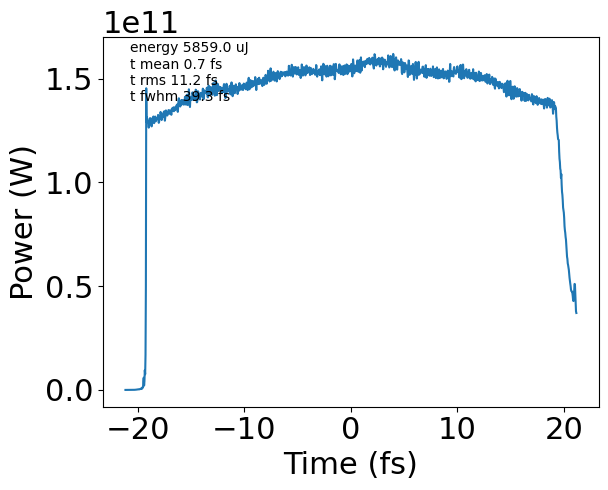

norm = 174111008547797.88     energy = 5859.0  uJ    x , y  mean = -8.1 um , 0.1 um      x , y  rms = 47.6 um , 47.7 um     wx , wy = 95.2 um , 95.4 um     x , y  fwhm = 80.5 um , 84.4 um


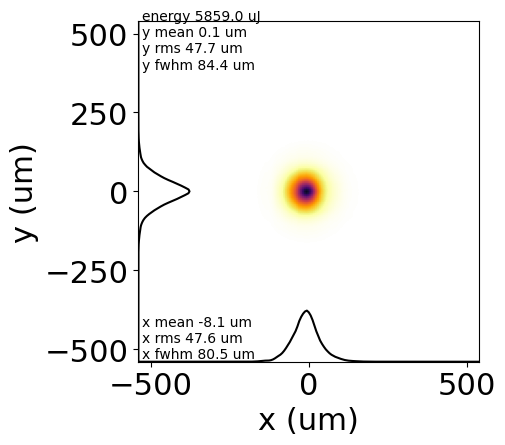

(9831.0, 9833.0)

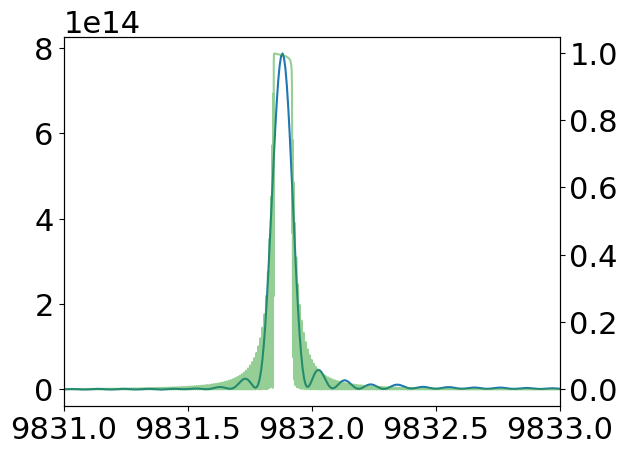

In [11]:
ncar = 181
zsep = 80
xlamds = 1.261043e-10
cspeed = 299792458
dt = zsep*xlamds/cspeed

init_file = 'data_testbw_flat_40/tap0.03_K1.172_n10.out.dfl'
dfl = read_dfl(init_file, ncar=ncar)
plot_fld_power(dfl, dt = dt)
plot_fld_marginalize_t(dfl, dgrid = 540.e-6, dt=dt)
hws, spectra = get_spectrum(dfl, zsep, xlamds, npad = 10000, onaxis=True)
plt.figure()
plt.plot(hws,spectra)
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(Eph, R0H, color = 'C2', alpha = 0.5)
plt.xlim([9831, 9833])

In [7]:
folder_name = 'data_testbw_flat_20'
power_result = []
energy_result = []
nRound = 10

for iteration in range(nRound):
    filename = 'n' + str(iteration) + '_recirc' + '.txt'
    power_list = []
    with open(folder_name + '/' + filename) as f:
        lines = f.readlines()

    round_list = []
    power_list = []
    energy_list = []
    for k in range(1,len(lines)):
        temp = lines[ k].split(' ')
        nround = int(temp[0])
        energy = float(temp[1])
        power = float(temp[2])
        round_list.append(nround)
        power_list.append(power)
        energy_list.append(energy)
    power_list = [x for _, x in sorted(zip(round_list, power_list))]
    energy_list = [x for _, x in sorted(zip(round_list, energy_list))]
    power_result.extend(power_list)
    energy_result.extend(energy_list)



power1 = power_result
energy1 = energy_result

In [8]:
folder_name = 'data_testbw_flat_40'
power_result = []
energy_result = []
nRound = 10

for iteration in range(nRound):
    filename = 'n' + str(iteration) + '_recirc' + '.txt'
    power_list = []
    with open(folder_name + '/' + filename) as f:
        lines = f.readlines()

    round_list = []
    power_list = []
    energy_list = []
    for k in range(1,len(lines)):
        temp = lines[ k].split(' ')
        nround = int(temp[0])
        energy = float(temp[1])
        power = float(temp[2])
        round_list.append(nround)
        power_list.append(power)
        energy_list.append(energy)
    power_list = [x for _, x in sorted(zip(round_list, power_list))]
    energy_list = [x for _, x in sorted(zip(round_list, energy_list))]
    power_result.extend(power_list)
    energy_result.extend(energy_list)



power2 = power_result
energy2 = energy_result

Text(0, 0.5, 'Pulse energy (mJ)')

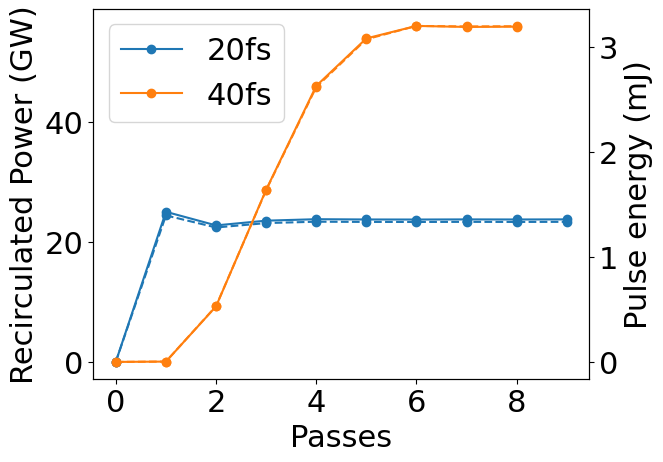

In [12]:
plt.plot(power1,'o-', label = '20fs')
#plt.yscale('log')
plt.plot(power2, 'o-', label = '40fs')

#plt.plot(power3, 'o-', label = '30fs')
#plt.plot(power4, 'o-', label = '40fs')
plt.legend()
plt.xlabel('Passes')
plt.ylabel('Recirculated Power (GW)')
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(np.array(energy1)/1e3, 'o--')
ax2.plot(np.array(energy2)/1e3, 'o--')
#ax2.plot(np.array(energy3)/1e3, 'o--')
#ax2.plot(np.array(energy4)/1e3, 'o--')
#plt.yscale('log')
ax2.set_ylabel('Pulse energy (mJ)')